In [1]:
import pandas as pd
import numpy as np

from plotnine import *

import sqlite3

In [2]:
conn = sqlite3.connect("sabs_moonshot.db")

In [82]:
data = pd.read_sql_query(
    """
    SELECT
        compounds.smiles, compounds.MW, compounds.NMR_std_ratio,
        r_avg_IC50, f_avg_IC50, trypsin_IC50
    FROM assays
    INNER JOIN compounds ON compounds.id = assays.compound_id
    WHERE compounds.assayed = TRUE;
    """,
    conn
)
pd.to_numeric(data["r_avg_IC50"], errors='coerce')
pd.to_numeric(data["f_avg_IC50"], errors='coerce')
pd.to_numeric(data["trypsin_IC50"], errors='coerce')
data["r_avg_IC50"] = data["r_avg_IC50"].replace("", np.NaN)
data["f_avg_IC50"] = data["f_avg_IC50"].replace("", np.NaN)
data["trypsin_IC50"] = data["trypsin_IC50"].replace("", np.NaN)
data[:10]

,smiles,MW,NMR_std_ratio,r_avg_IC50,f_avg_IC50,trypsin_IC50
0,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,253.265,,NaN,54.272964,99.0
1,N#Cc1cccc(NC(=O)Nc2c[nH]c3ncccc23)c1,277.287,,NaN,63.554925,99.0
2,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,287.322,,14.641091,26.680129,NaN
3,O=C(Cc1cncc2ccccc12)Nc1ccccc1,262.312,,45.077469,57.469670,99.0
4,N#Cc1cc(Cl)cc(NC(=O)Nc2cccnc2)c1,272.695,,NaN,99.010000,99.0
5,Cc1c(N)cncc1NC(=O)Cc1cccc(Cl)c1,275.739,,8.201698,4.222340,NaN
6,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,260.724,,13.895165,24.566619,99.0
7,Cc1ccncc1NC(=O)Nc1cccc(Cl)c1,261.712,,45.689263,64.413611,99.0
8,Cc1ccncc1NC(=O)C(C)c1cccc(Cl)c1,274.751,,12.967693,26.179638,99.0
9,Cc1c(N)cncc1NC(=O)Cc1cccc(C#N)c1,266.304,,32.221064,16.065560,NaN


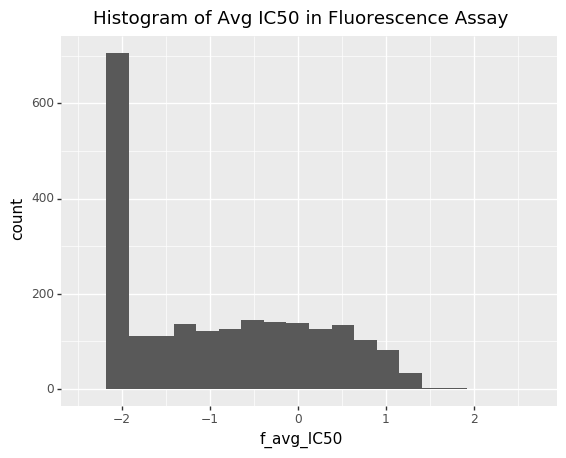

<ggplot: (8784874406613)>

In [77]:
(
    ggplot(pd.DataFrame(-np.log10(data["f_avg_IC50"].dropna()))) +
    geom_histogram(aes(x='f_avg_IC50'), bins=20) +
    ggtitle("Histogram of Avg IC50 in Fluorescence Assay")
)

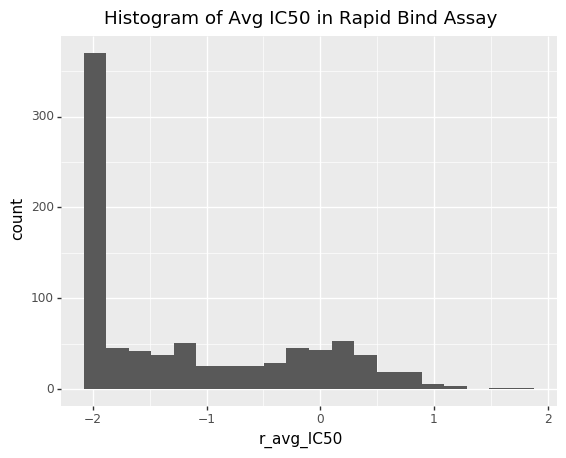

<ggplot: (8784874482773)>

In [78]:
(
    ggplot(pd.DataFrame(-np.log10(data["r_avg_IC50"].dropna()))) +
    geom_histogram(aes(x='r_avg_IC50'), bins=20) +
    ggtitle("Histogram of Avg IC50 in Rapid Bind Assay")
)

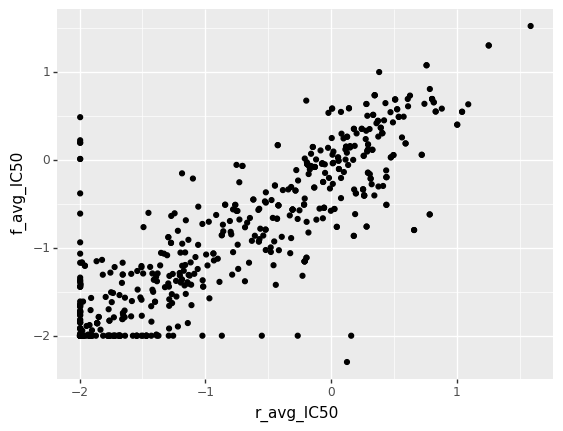

<ggplot: (8784874502397)>

In [102]:
(
    ggplot(pd.DataFrame(-np.log10(data[["r_avg_IC50", "f_avg_IC50"]]).dropna())) + 
    geom_point(aes(x='r_avg_IC50', y='f_avg_IC50'))
)

In [122]:
clean_data = data[["smiles", "MW", "r_avg_IC50", "f_avg_IC50"]].dropna()
clean_data

,smiles,MW,r_avg_IC50,f_avg_IC50
2,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,287.322,14.641091,26.680129
3,O=C(Cc1cncc2ccccc12)Nc1ccccc1,262.312,45.077469,57.469670
5,Cc1c(N)cncc1NC(=O)Cc1cccc(Cl)c1,275.739,8.201698,4.222340
6,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,260.724,13.895165,24.566619
7,Cc1ccncc1NC(=O)Nc1cccc(Cl)c1,261.712,45.689263,64.413611
...,...,...,...,...
1616,Cc1ccc(C)c(S(=O)(=O)N2CCN(C(=O)CCl)CC2)c1,330.837,1.623369,14.216485
1637,O=C(Nc1cncc2ccccc12)C1CCOc2cc(Cl)c(Cl)cc21,372.04,0.309337,0.205428
1711,O=C(CCl)N1CCN(Cc2cccc(Cl)c2)CC1,287.19,0.545448,2.536267
1802,O=C(CCl)N1CCN(S(=O)(=O)c2cccc(F)c2)CC1,320.773,2.023561,3.666429
